In [34]:
import tensorflow as tf
from tensorflow.keras.layers import(Flatten,Dense,Dropout,RandomRotation,RandomFlip,Rescaling,Input,Conv2D,MaxPooling2D)
from tensorflow.keras.callbacks import(EarlyStopping,ModelCheckpoint)
import os
from PIL import Image

In [25]:
from tensorflow.keras import Sequential

In [18]:
import os
import tensorflow as tf

img_skip = 0
for folder_name in ('Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'):
    folder_path = os.path.join('data', folder_name)
    for f_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, f_name)
        try:
            img_bytes = tf.io.read_file(file_path)
            tf.io.decode_image(img_bytes)
        except Exception as e:
            print(f'Corrupt file found and being deleted: {file_path}')
            img_skip += 1
            if os.path.exists(file_path):
                os.remove(file_path)

print(f"Pictures deleted due to being corrupted: {img_skip}")


Pictures deleted due to being corrupted: 0


In [ ]:
directory='data'

train_ds=tf.keras.utils.image_dataset_from_directory(
    directory,
    subset='training',
    validation_split=0.3,
    seed=42,
    image_size=(255,255),
    batch_size=20

)

val_ds=tf.keras.utils.image_dataset_from_directory(
    directory,
    subset='validation',
    seed=42,
    image_size=(255,255),
    batch_size=20,
    validation_split=0.3

)

Found 4188 files belonging to 4 classes.
Using 2932 files for training.
Found 4188 files belonging to 4 classes.
Using 1256 files for validation.


In [52]:
sequential_models=Sequential([
    Input(shape=(255,255,3)),
    RandomFlip('horizontal'),
    RandomRotation(0.9),
    Rescaling(1./255),
    Conv2D(filters=30,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=60,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=90,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=160,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200,activation='relu'),
    Dropout(0.3),
    Dense(150,activation='relu'),
    Dropout(0.3),
    Dense(100,activation='relu'),
    Dropout(0.3),
    Dense(4,activation='softmax')

])

In [53]:
sequential_models.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
sequential_models.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_7 (RandomFlip)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 255, 255, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 253, 253, 30)   │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 126, 126, 30)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 124, 124, 60)   │        16,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 90)     │        48,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 90)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 160)    │       129,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 31360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 200)            │     6,272,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,513,404 (24.85 MB)

 Trainable params: 6,513,404 (24.85 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
sequential_models.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[EarlyStopping(patience=5,monitor='val_accuracy',restore_best_weights=True,mode='max'),
    ModelCheckpoint('maize_disease.keras',monitor='val_loss',save_best_only=True,mode='min')
    ]
)
                      


Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 141s 949ms/step - accuracy: 0.4589 - loss: 1.0765 - val_accuracy: 0.5613 - val_loss: 0.8891
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 139s 948ms/step - accuracy: 0.5936 - loss: 0.8454 - val_accuracy: 0.7962 - val_loss: 0.5328
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 138s 935ms/step - accuracy: 0.7962 - loss: 0.5565 - val_accuracy: 0.8105 - val_loss: 0.4516
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 138s 940ms/step - accuracy: 0.8098 - loss: 0.5746 - val_accuracy: 0.8161 - val_loss: 0.3979
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 136s 923ms/step - accuracy: 0.8309 - loss: 0.4066 - val_accuracy: 0.8225 - val_loss: 0.3947
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 140s 952ms/step - accuracy: 0.8391 - loss: 0.3891 - val_accuracy: 0.8511 - val_loss: 0.3766
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 138s 939ms/step - accuracy: 0.8599 - loss: 0.3152 - val_accuracy: 0.8559 - val_loss: 0.3225
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 131s 892ms/step - accuracy: 0.8746 -

In [58]:
zey_maize=tf.keras.models.load_model('maize_disease.keras')

In [61]:
loss,accuracy=sequential_models.evaluate(val_ds)

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.9065 - loss: 0.2859


In [64]:
import numpy as np

In [86]:
img=tf.keras.utils.load_img('gray1_leaf.jpg',target_size=(255,255))
img_arrays=tf.keras.utils.img_to_array(img)
img_batch=np.expand_dims(img_arrays,axis=0)

In [87]:
predictions = zey_maize.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
classnames = train_ds.class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [88]:
index = np.argmax(predictions)
print(f" the model predicted that its a {classnames[index]} with {predictions[0][index]*100:.1f}%  confidence")

 the model predicted that its a Gray_Leaf_Spot with 47.9%  confidence


In [92]:
import matplotlib.pyplot as plt

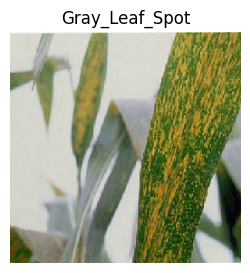

In [93]:
plt.figure(figsize=(3,3))
plt.plot()
plt.imshow(img)
plt.title(f'{classnames[index]}')
plt.axis("off")
plt.show()